K-Nearest Neighbours

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [7]:
data=pd.read_csv('https://raw.githubusercontent.com/ygtech27/Datasets/refs/heads/main/Zoo.csv')
data
data.info()
data.isnull().sum()
data.describe()
data['animal name'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [8]:
#droping the 'animal name' column
data.drop('animal name',axis=1,inplace=True)
data

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


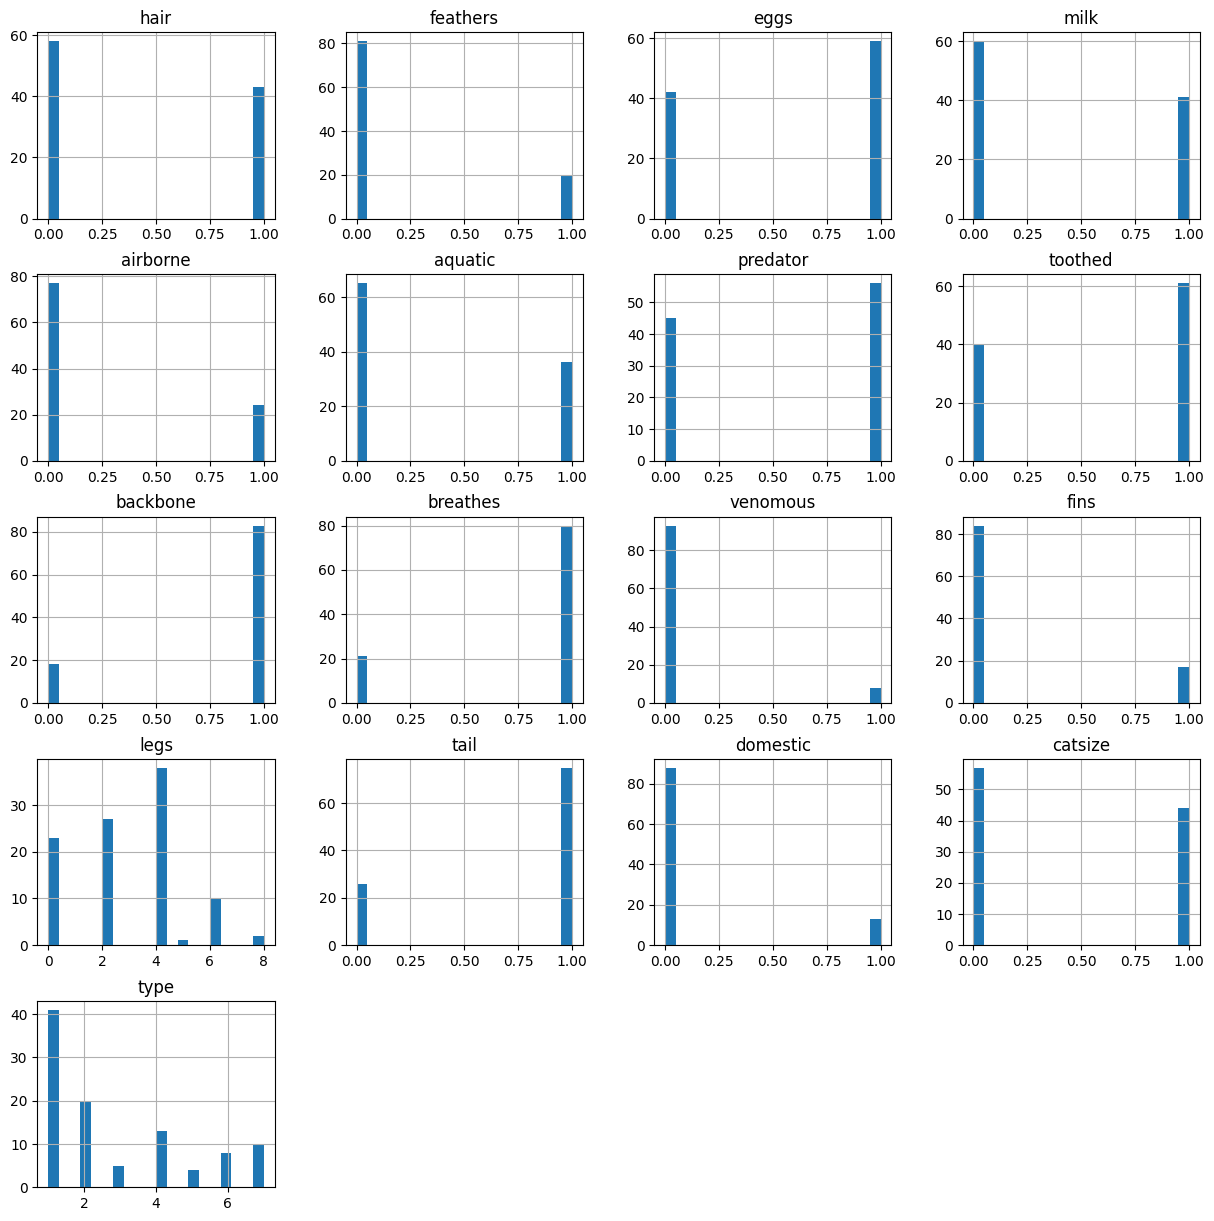

In [9]:
data.hist(bins=20,figsize=(15,15))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

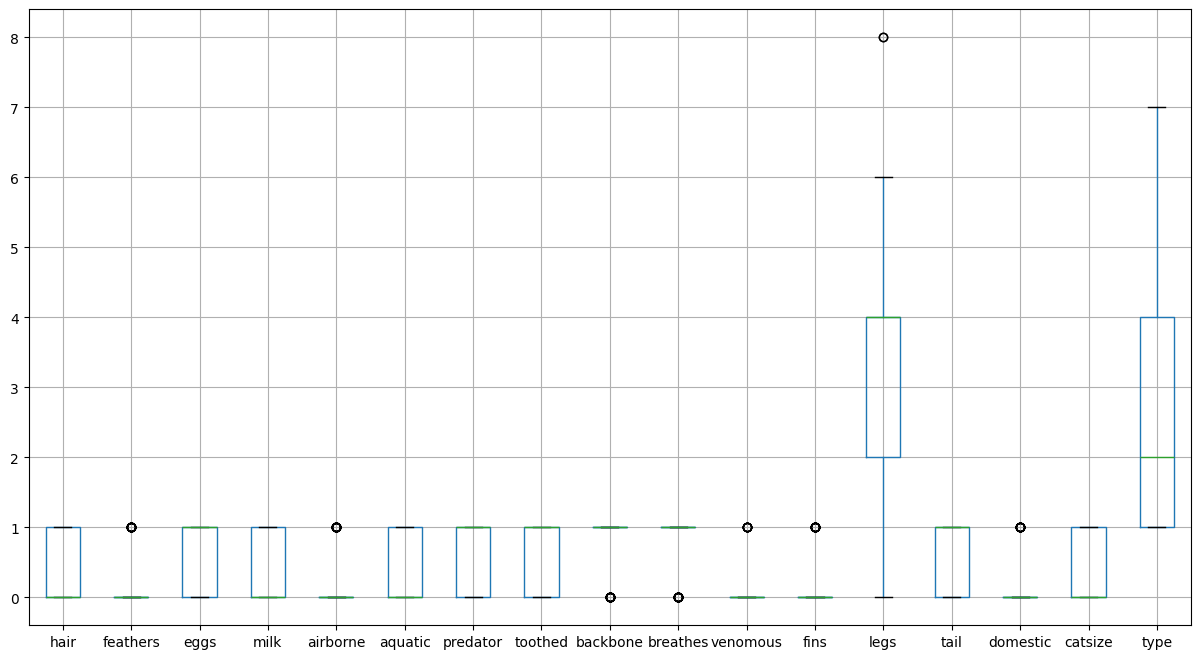

In [10]:
data.boxplot(figsize=(15,8))
plt.show

<Axes: xlabel='type', ylabel='count'>

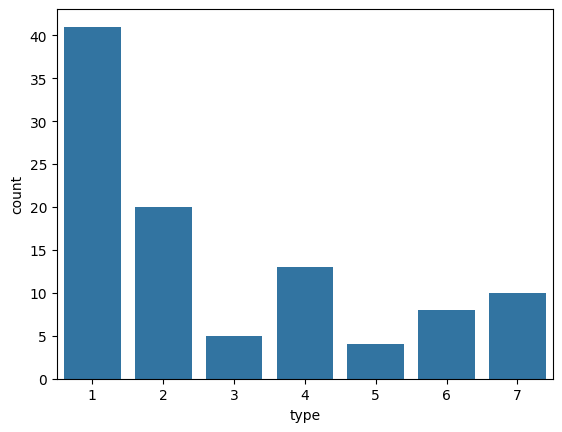

In [11]:
sns.countplot(x='type',data=data)

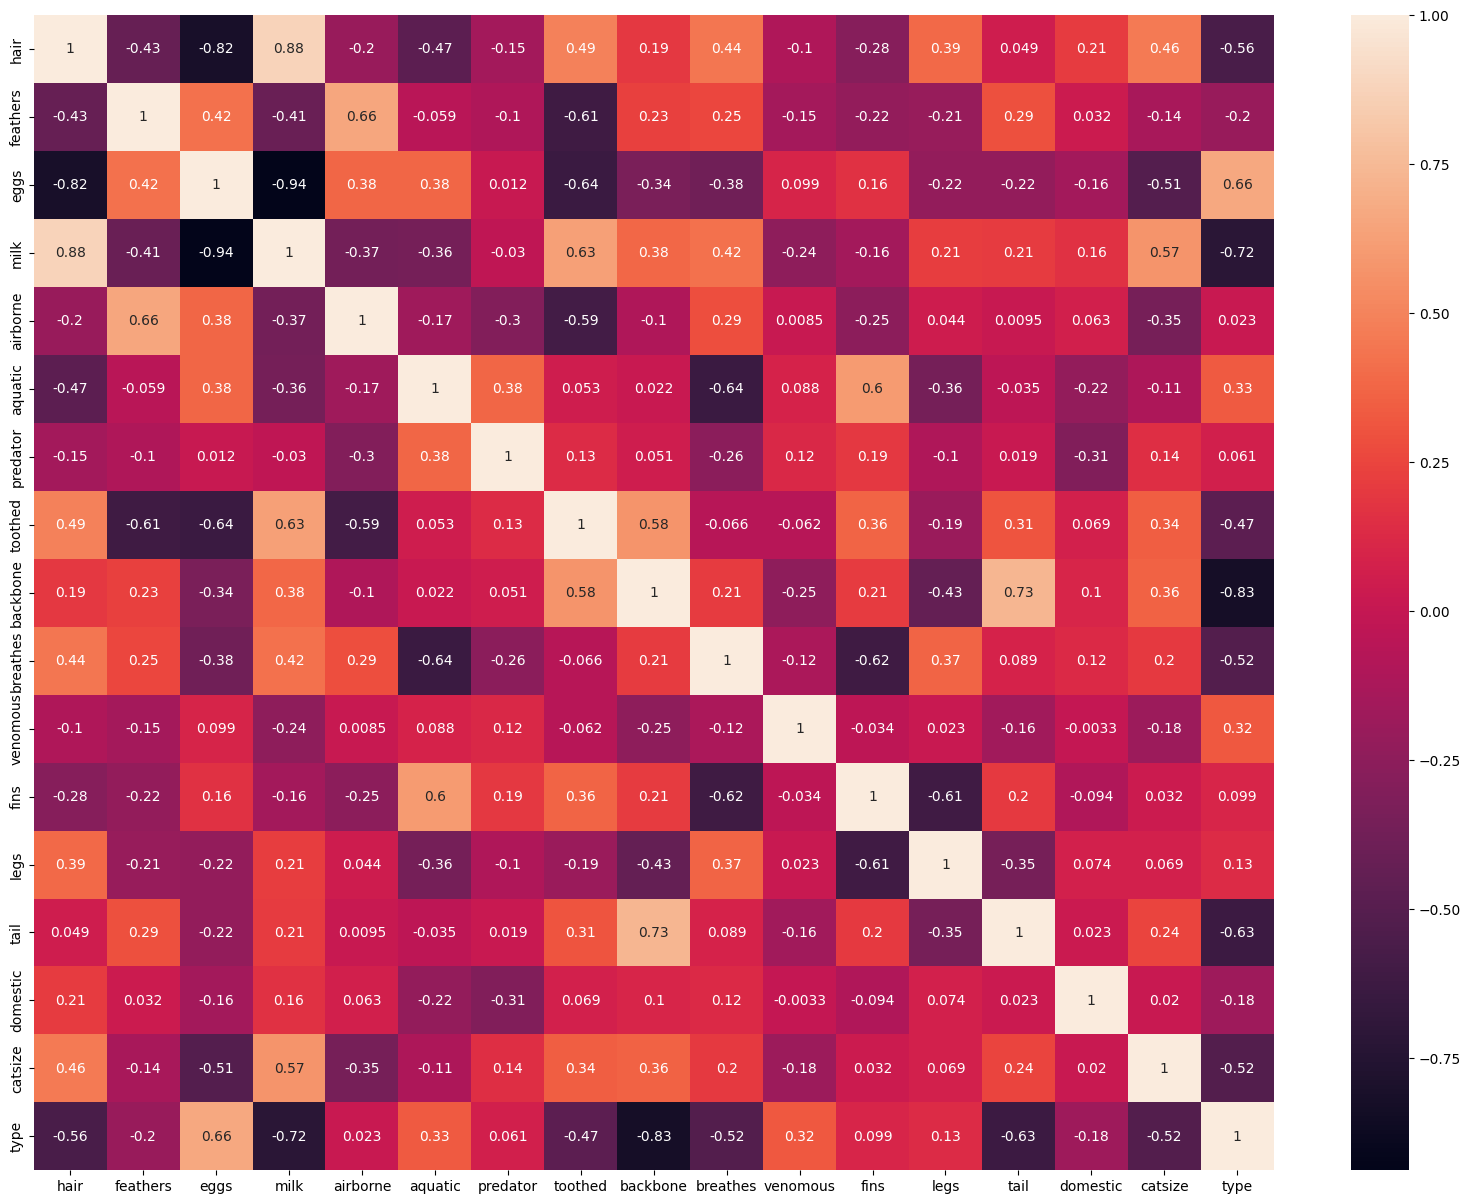

In [12]:
corr=data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
features=data.drop('type',axis=1)
target=data['type']
features

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [14]:
target

,type
0,1
1,1
2,4
3,1
4,1
...,...
96,1
97,6
98,1
99,7


In [15]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)
model=KNeighborsClassifier(n_neighbors=7,metric='euclidean')
model.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [16]:
ypred=model.predict(x_test)
accuracy_score(y_test,ypred)

0.8571428571428571

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
params={
    'n_neighbors':[1,2,3,4,5,6,7],
    'metric':['euclidean','manhattan','minkowski']

}
grid=GridSearchCV(estimator=model,param_grid=params)
grid.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(metric='euclidean', n_neighbors=7),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7]})

In [19]:
print('Best Params',grid.best_params_)

Best Params {'metric': 'euclidean', 'n_neighbors': 1}


In [20]:
print('Best Score',(grid.best_score_)*100)

Best Score 97.5


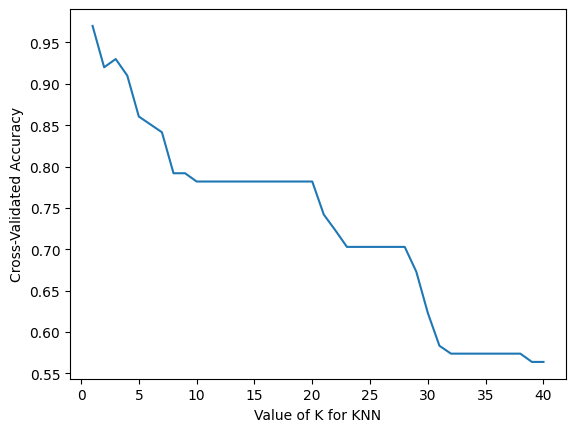

In [21]:
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, features, target)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Interview Questions:


1.What are the key hyperparameters in KNN?

A k-nearest neighbors is algorithm used for classification and regression. It classifies a new data point by finding the k-nearest points in the training dataset and assigns it the majority class among those neighbors. Machine learning algorithms have hyperparameters that allow you to tailor the behavior of the algorithm to your specific dataset. Hyperparameters Tuning can improve model performance by about 20% to a range of 77% for all evaluation matrices. Hyperparameter tuning in k-nearest neighbors (KNN) is important because it allows us to optimize the performance of the model. The KNN algorithm has several hyperparameters that can significantly affect the accuracy of the model, such as the number of nearest neighbors to consider (k), the distance metric used to measure similarity, and the weighting scheme used to aggregate the labels of the nearest neighbors.

What distance metrics can be used in KNN?2.

1)Euclidean distance 2)Manhattan distance 3)Minkowski distance 4)Cosine similarity

How to choose the best distance metric

When selecting a distance metric to optimize your KNN algorithm, there is no one-size-fits-all solution. However, you can use some general guidelines to help you make the best choice. Analyzing your data and understanding the type, scale, range, and distribution of your features is essential. Experimenting with different distance metrics and comparing their results and performance on your data and problem is also key. Cross-validation and other evaluation methods can help measure the accuracy and quality of your KNN algorithm with different distance metrics. Additionally, consider the computational complexity and interpretability of the distance metrics, as well as how they affect your KNN algorithm. Lastly, try to use domain knowledge and intuition to select a distance metric that makes sense for your data and problem.